In [20]:
# Importar librerias
# Para descriptrivas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para inferenciales

from scipy import stats
from scipy.stats import pearsonr

#Para regresion lineal
import statsmodels.api as sm




In [2]:
#DEfinit DataFrame
file_path = "C:/Users/fsalg/Downloads/boston_housing.csv"
boston_df = pd.read_csv(file_path)

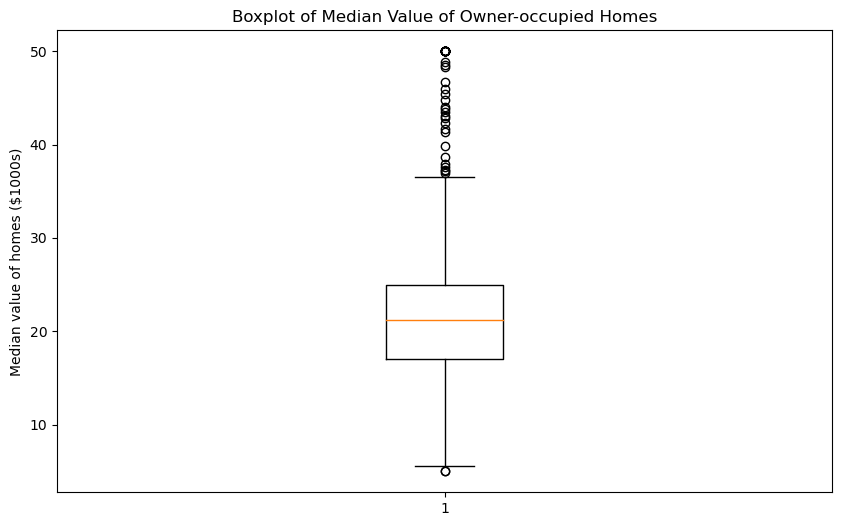

In [3]:
#Analitica Descriptiva

plt.figure(figsize=(10, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-occupied Homes')
plt.ylabel('Median value of homes ($1000s)')
plt.show()

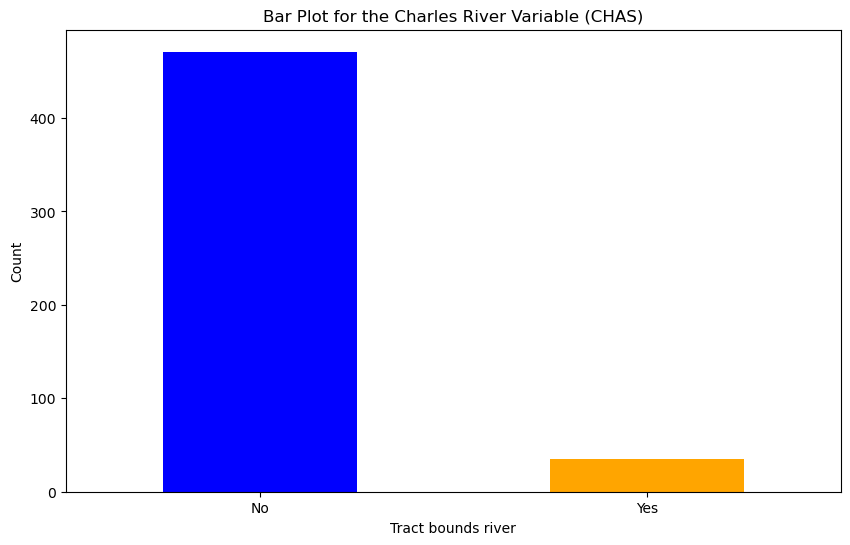

In [6]:
chas_counts = boston_df['CHAS'].value_counts()

# Crear el gráfico de barras para la variable CHAS
plt.figure(figsize=(10, 6))
chas_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Bar Plot for the Charles River Variable (CHAS)')
plt.xlabel('Tract bounds river')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

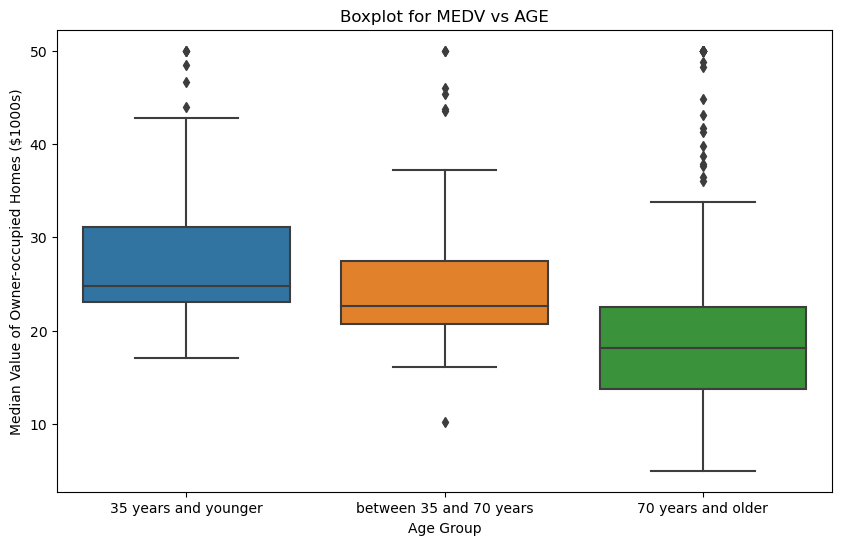

In [8]:
#Hacer discreta la variable de Age Group
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'],
                                 bins=[-1, 35, 70, float('inf')],
                                 labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Crea el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot for MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-occupied Homes ($1000s)')
plt.show()

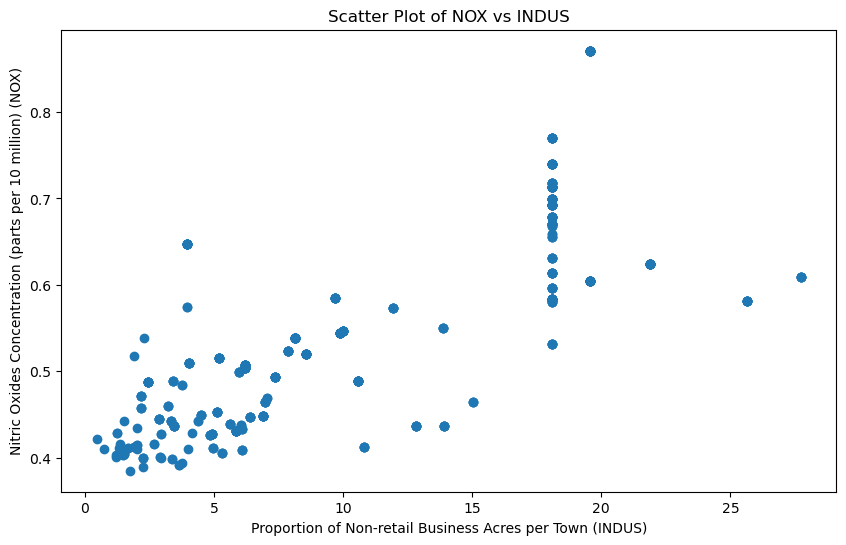

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (parts per 10 million) (NOX)')
plt.show()

In [10]:
# Calcular la correlación entre NOX y INDUS en el conjunto de datos de viviendas de Boston
nox_indus_correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print("La correlación entre las concentraciones de NOX y la proporción de INDUS es:", nox_indus_correlation)


La correlación entre las concentraciones de NOX y la proporción de INDUS es: 0.7636514469209147


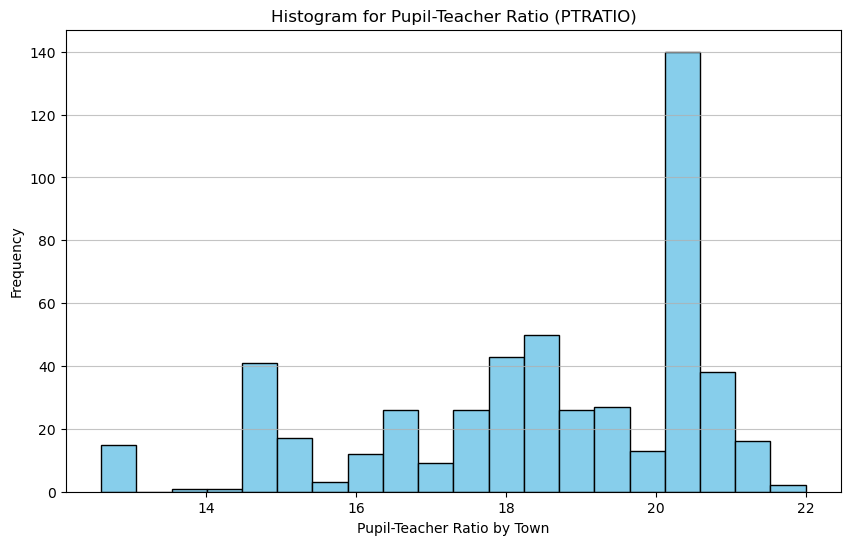

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [13]:
# Analitica Inferencial
# T-Test para descucrir una diferencia significativa entre las casas que estan en el rio y las que no

# Separar los datos en dos grupos: viviendas limitadas por el río Charles y las que no
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Realizar el T-test para muestras independientes
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [14]:
print("P-value < 0.05 significa que las medias de los dos grupos son significativamente diferentes")

P-value < 0.05 significa que las medias de los dos grupos son significativamente diferentes


In [15]:
# Suponiendo que 'AGE_GROUP' es la columna que ya categorizamos en un paso anterior
# Crear grupos basados en estas categorías para ANOVA
group1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

# Realizar ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


In [16]:
print("P-value < 0.05 significa que las medias de los tres grupos son significativamente diferentes")

P-value < 0.05 significa que las medias de los tres grupos son significativamente diferentes


In [18]:
# Calcular la correlación de Pearson entre NOX y INDUS
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Coeficiente de correlación de Pearson:", correlation_coefficient)
print("P-value:", p_value)

Coeficiente de correlación de Pearson: 0.763651446920915
P-value: 7.913361061239593e-98


In [19]:
print("P-value < 0.05 significa que las concentraciones de NOX e INDUS están significativamente correlacionadas")

P-value < 0.05 significa que las concentraciones de NOX e INDUS están significativamente correlacionadas


In [21]:
# Definir la variable independiente (X) y la dependiente (y)
X = boston_df['DIS']  # Variable independiente: DIS
y = boston_df['MEDV']  # Variable dependiente: MEDV

# Añadir una constante a la variable independiente para el término intercepto
X = sm.add_constant(X)

# Construir el modelo de regresión
model = sm.OLS(y, X).fit()

# Obtener y mostrar un resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        12:52:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0